In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
prefix = '/content/gdrive/'#My Drive
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'My Drive/Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework

MessageError: ignored

In [ ]:
df = pd.read_csv(sys_path + 'creditcard.csv')


In [ ]:
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent Vs Normal Transactions')
plt.show()


Text(0.5, 1.0, 'Heatmap of Correlation')

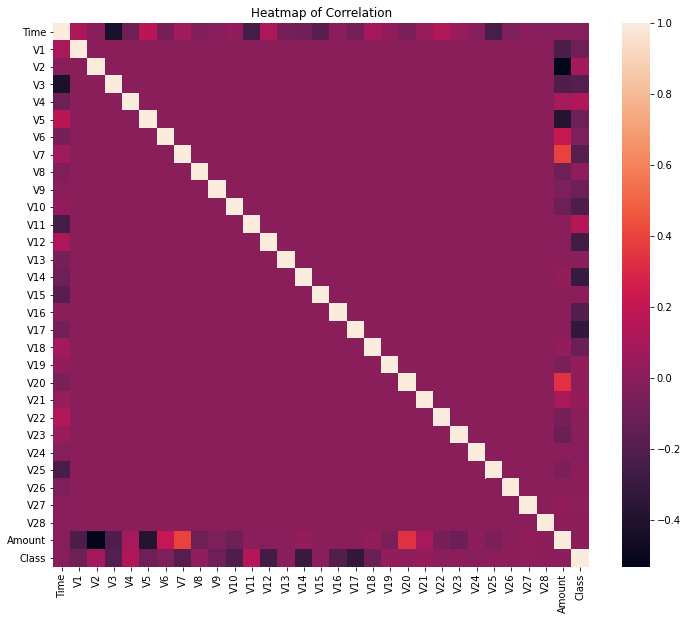

In [ ]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [ ]:
#Count
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


In [ ]:
#Get x and y, then train the data
x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
y = df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
#Number of fraudulent and normal transactions in the training data
no_of_frauds = df['Class'].value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))
no_of_normal = df['Class'].value_counts()[0]
print('There are {} normal transactions in the train data.'.format(no_of_normal))

There are 492 fraudulent transactions in the train data.
There are 284315 normal transactions in the train data.


In [ ]:
#Experiments on Logistic Regression model
#Before Resampling the data
log_classify = LogisticRegression(random_state=1)

param_dict = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_model = GridSearchCV(log_classify, param_dict, cv=5, scoring='accuracy')

log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)
auc_score_log = roc_auc_score(y_test, y_pred_log)
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

print("auc_score for logistic regression before resampling ={}".format(auc_score_log))


[[56865     5]
 [   50    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.89      0.46      0.60        92

    accuracy                           1.00     56962
   macro avg       0.95      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962

auc_score for logistic regression before resampling =0.728216909656654


In [ ]:
#setting oversampler
oversamp=RandomOverSampler(1)

In [ ]:
#Resampling the data
x_train_os,y_train_os=oversamp.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#After Resampling the data
log_classify = LogisticRegression(random_state=1)

param_dict = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_model = GridSearchCV(log_classify, param_dict, cv=5, scoring='accuracy')

log_model.fit(x_train_os,y_train_os)
y_pred_log=log_model.predict(x_test)
auc_score_log = roc_auc_score(y_test, y_pred_log)
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

print("auc_score for logistic regression after resampling ={}".format(auc_score_log))


[[55581  1289]
 [   10    82]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56870
           1       0.06      0.89      0.11        92

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

auc_score for logistic regression after resampling =0.9343193094854015


In [ ]:
#Experiments on Decision Tree classifier
#Before Resampling the data
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_t_clf = clf.predict(x_test)

auc_score_dec_ = roc_auc_score(y_test, y_pred_t_clf)
print(confusion_matrix(y_test,y_pred_t_clf))
print(classification_report(y_test,y_pred_t_clf))


print("auc_score for Decision tree before resampling ={}".format(auc_score_dec_))


[[56847    23]
 [   29    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.73      0.68      0.71        92

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962

auc_score for Decision tree before resampling =0.8421890887684346


In [ ]:
#Resampling the data
x_train_os,y_train_os=oversamp.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#After Resampling the data
clf = tree.DecisionTreeClassifier()
clf.fit(x_train_os,y_train_os)
y_pred_t_clf = clf.predict(x_test)

auc_score_dec_ = roc_auc_score(y_test, y_pred_t_clf)
print(confusion_matrix(y_test,y_pred_t_clf))
print(classification_report(y_test,y_pred_t_clf))

print("auc_score for Decision tree after resampling ={}".format(auc_score_dec_))

[[56860    10]
 [   29    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.86      0.68      0.76        92

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

auc_score for Decision tree after resampling =0.8423033845306993


In [ ]:
#Experiments on Naive Bayes classifier
#Before Resampling the data
nai = GaussianNB()
#fit the model
nai.fit(x_train,y_train)
#predict the test data
y_pred_n_nai  = nai.predict(x_test)
auc_score_naive = roc_auc_score(y_test, y_pred_n_nai)
print(confusion_matrix(y_test,y_pred_n_nai))
print(classification_report(y_test,y_pred_n_nai))

print("auc_score for Naive Bayes before resampling ={}".format(auc_score_naive))


[[56162   708]
 [   15    77]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.10      0.84      0.18        92

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962

auc_score for Naive Bayes before resampling =0.9122535378169891


In [ ]:
#Resampling the data
x_train_os,y_train_os=oversamp.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#After Resampling the data
nai = GaussianNB()
#fit the model
nai.fit(x_train_os,y_train_os)
#predict the test data
y_pred_n_nai  = nai.predict(x_test)
auc_score_naive = roc_auc_score(y_test, y_pred_n_nai)
print(confusion_matrix(y_test,y_pred_n_nai))
print(classification_report(y_test,y_pred_n_nai))

print("auc_score for Naive Bayes After resampling ={}".format(auc_score_naive))

[[55895   975]
 [   14    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56870
           1       0.07      0.85      0.14        92

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962

auc_score for Naive Bayes After resampling =0.9153408613083998


In [ ]:
#Compute the predictive probability of the test data on the models
y_pred_prob_dec = clf.predict_proba(x_test)[:,1]
y_pred_prob_log = log_model.predict_proba(x_test)[:,1]
y_pred_prob_nai = nai.predict_proba(x_test)[:,1]

In [ ]:
#Compute the AUC Scores for the models
auc_score_log = roc_auc_score(y_test, y_pred_log)
auc_score_decision_tree = roc_auc_score(y_test, y_pred_t_clf)
auc_score_naive_bayes = roc_auc_score(y_test, y_pred_n_nai)


In [ ]:
#Calculate the roc_curve
fpr1, tpr1, t  = roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, t = roc_curve(y_test, y_pred_prob_dec)
fpr3, tpr3, t = roc_curve(y_test, y_pred_prob_nai)


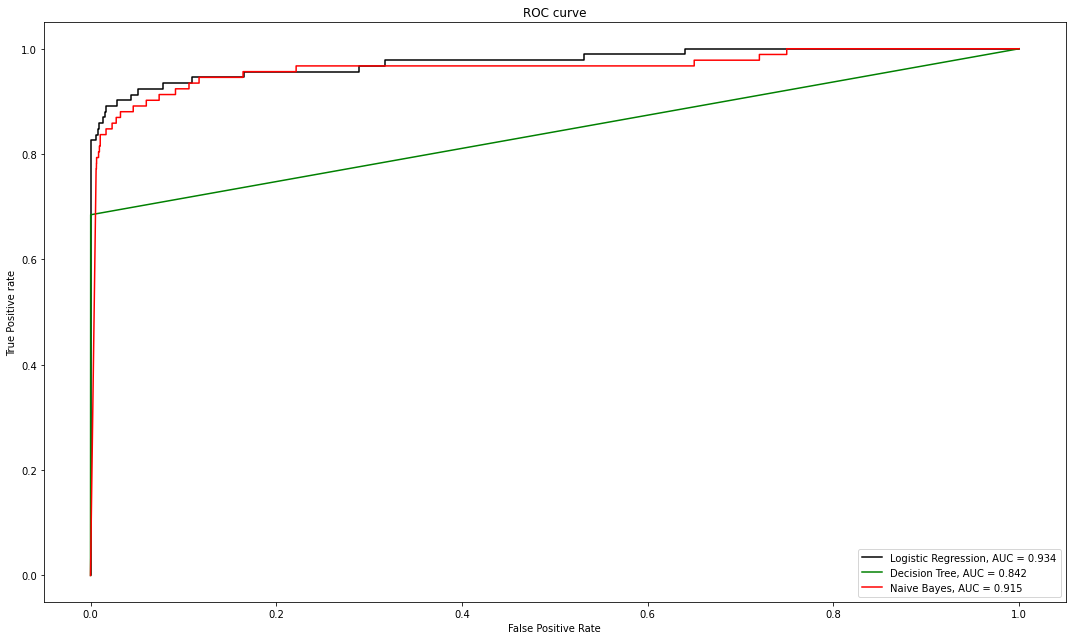

In [ ]:
#Plot the ROC Curve
fig = plt.figure(figsize=(15,9))
plt.plot(fpr1, tpr1, linestyle='-',color='black', label= "Logistic Regression, AUC = {:.3f}".format(auc_score_log))
plt.plot(fpr2, tpr2, linestyle='-',color='green', label="Decision Tree, AUC = {:.3f}".format(auc_score_decision_tree))
plt.plot(fpr3, tpr3, linestyle='-',color='red', label= "Naive Bayes, AUC = {:.3f}".format(auc_score_naive_bayes))



# title
plt.title('ROC curve')
#x label
plt.xlabel('False Positive Rate')
# # y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.tight_layout()
plt.show()